# Assignment 5: Statistical Analysis (30 pt)

Use as many Python and markdown cells per question as you deem necessary. **DO NOT SUBMIT CODE THAT DOES NOT RUN.** You will lose points for code that throws errors. 

Questions 1 and 2 will use data describing various wetlands, intertidal zones, and ocean conditions in the United States from 1972-2015. This data has been adapted from [publicly available data from NASA](https://daac.ornl.gov/NACP/guides/Tidal_Wetland_Estuaries_Data.html). Note that this file uses the value `-9999` to denote missing data. This file's path is `data/tidal_wetland_estuaries.csv`.

Question 3 will be using time series data describing the proportion of electricity produced by coal in high income countries from [the World Bank](https://data.worldbank.org/indicator/EG.ELC.COAL.ZS). The path to the file is `data/coal-production.csv`.


## Question 1: t-tests (10 pt)

Using the data from `tidal_wetland_estuaries.csv`, test the hypothesis that soil organic carbon density (column name: `soc_density`) is **larger** in the East coast than the West coast with a t-test. Interpret the t-test. (5 pt)

Defend your choice of which type of t-test you used (3 pt).

Do the data meet the requirement for normal data? Why or why not? (2 pt) 

In [15]:
import scipy.stats as stats
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.tsa.arima.model import ARIMA


sns.set_style('white')

In [16]:
df = pd.read_csv('data/tidal_wetland_estuaries.csv')

df = df.replace(-9999, np.NaN)

df_east = df.loc[(df['coast']=="EAST"),:]
df_west = df.loc[(df['coast']=="WEST"),:]

stats.ttest_ind(df_east['soc_density'], df_west['soc_density'], alternative='two-sided', nan_policy='omit')

Ttest_indResult(statistic=8.45031778669312, pvalue=1.1530568956025483e-12)

Because the t-statistic is large, it indicates that the soc density larger in the east coast than it is in the west coast. This result is significant because the p-value is sufficiently small.

I used a 2-sample t-test to test this data. 2-sample t-tests are used to compare the means of two different sets of data, so it was the right choice to compare the means of soc density on the east and west coast. 

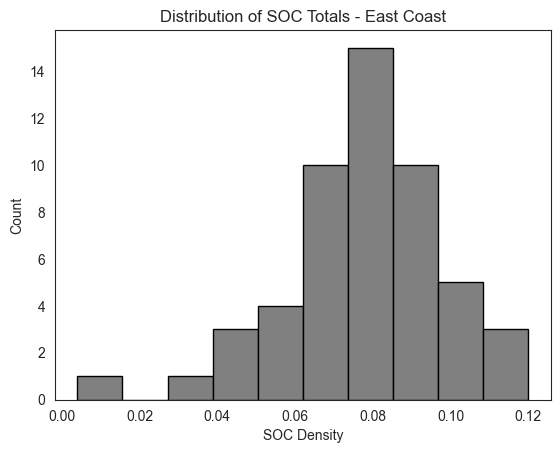

In [17]:
figure, ax = plt.subplots()
ax.hist(df_east['soc_density'],bins=10, color="grey", edgecolor='black')
ax.set_xlabel('SOC Density')
ax.set_ylabel('Count')
ax.set_title('Distribution of SOC Totals - East Coast')
plt.show()

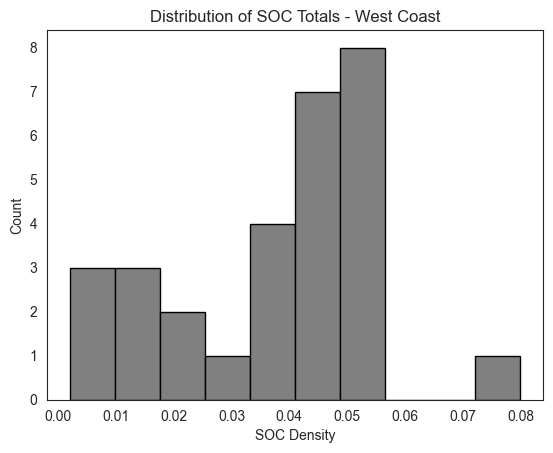

In [18]:
figure, ax = plt.subplots()
ax.hist(df_west['soc_density'],bins=10, color="grey", edgecolor='black')
ax.set_xlabel('SOC Density')
ax.set_ylabel('Count')
ax.set_title('Distribution of SOC Totals - West Coast')
plt.show()

The data for the east coast appears to be normally distrubuted, as the data is centralized around a mean and diminishes in frequency the further it goes from the mean.

The data for the west coast appears to be less normally distrubuted. Even though the data becomes less frequent the further it is from the mean, there is a larger cluster of data that is lower than the mean.

## Question 2

Using the data from `tidal_wetland_estuaries.csv`, create a linear model to predict mean ocean salinity (column name: `ocean_salinity_mean`) from other environmental factors. (2 pt)

Create a model with a high R-squared value (> 0.80). All coefficients should be significant, and none should have VIF values above 5.0. (4 pt)

Interpret the summary of the model, focusing on the R-squared value and the regression coefficients. (3 pt)

Make diagnostic plots to ensure your data meets the assumptions of linear regression. The necessary functions have been imported for you. (1 pt).

In [19]:
from utils import Linear_Reg_Diagnostic # do not change!
import statsmodels.formula.api as smf

model = smf.ols(formula="ocean_salinity_mean ~ tide_ht + ocean_diss_inorg_p + ocean_no3 + tide_flow + mean_precip", data=df).fit()

In [20]:

myModel = Linear_Reg_Diagnostic(model)
myModel.vif_table()
model.summary()

             Features  VIF Factor
4           tide_flow        1.07
5         mean_precip        1.09
1             tide_ht        1.84
2  ocean_diss_inorg_p        2.08
3           ocean_no3        2.43
0           Intercept       12.01


<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     ocean_salinity_mean   R-squared:                       0.877
Model:                             OLS   Adj. R-squared:                  0.872
Method:                  Least Squares   F-statistic:                     154.6
Date:                 Mon, 01 May 2023   Prob (F-statistic):           1.53e-47
Time:                         14:17:42   Log-Likelihood:                -97.717
No. Observations:                  114   AIC:                             207.4
Df Residuals:                      108   BIC:                             223.9
Df Model:                            5                                         
Covariance Type:             nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             36.9502      0.190    194.333      0.000      36.573      37.327
tide_ht                0.2201      0.078      2.839      0.005       0.066       0.374
ocean_diss_inorg_p    -7.7411      0.450    -17.212      0.000      -8.633      -6.850
ocean_no3             -0.1877      0.070     -2.697      0.008      -0.326      -0.050
tide_flow           -8.82e-11   2.87e-11     -3.076      0.003   -1.45e-10   -3.14e-11
mean_precip           -0.0005      0.000     -3.990      0.000      -0.001      -0.000
==============================================================================
Omnibus:                        3.207   Durbin-Watson:                   0.393
Prob(Omnibus):                  0.201   Jarque-Bera (JB):                3.177
Skew:                           0.400   Prob(JB):                        0.204
Kurtosis:                       2.827   Cond. No.                     1.85e+10
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.85e+10. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

The high r-squared value in this model indicates that the independent variables (tide_ht, ocean_diss_inorg_p, ocean_no3, tide_flow, and soc_density) can explain a high percentage of the variance in the dependent variable (ocean_salinity_mean). Specifically, the r-squared value of .877 indicates that 87.7% of the variance in ocean_salinity_mean can be explained by variance in tide_ht, ocean_diss_inorg_p, ocean_no3, tide_flow, and soc_density. 

The coefficients attatched to individual independent variables are significant too. The most extreme coef, ocean_diss_inorg_p's coef of -7.7411 indicates that for every one unit of increase in ocean_salinity_mean decreases by 7.7411 units. The least extreme coef, tide_flow's coef of -8.82e-11 indicates that for every one unit of increase in tide_flow, there is a decrease -8.82e-11 unit decrease in ocean_salinity_mean.

<Axes: title={'center': 'Residuals vs Leverage'}, xlabel='Leverage', ylabel='Standardized Residuals'>

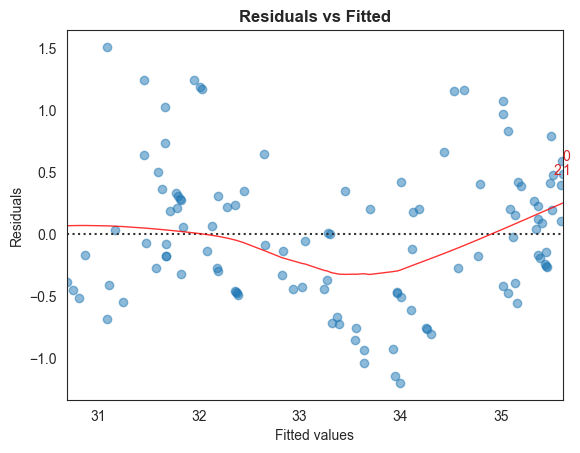

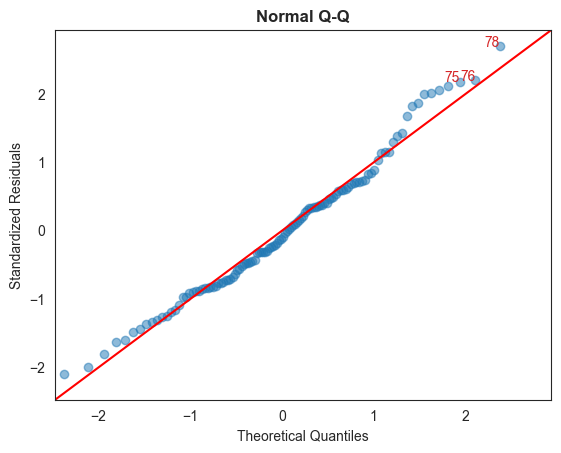

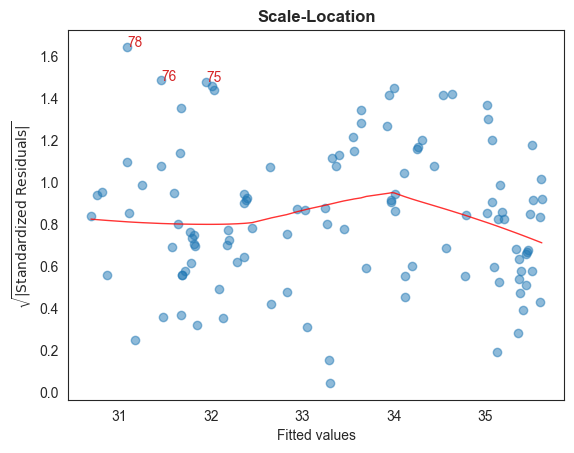

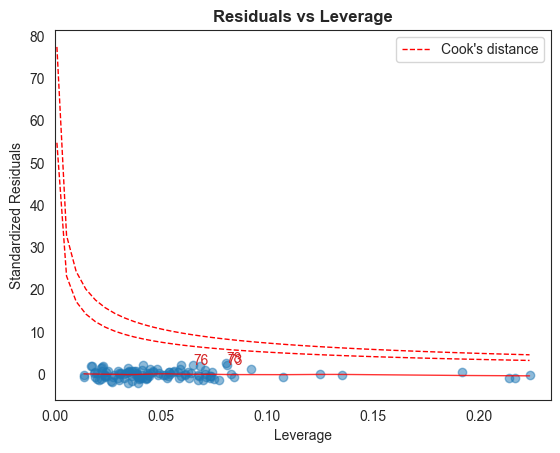

In [21]:
diagnostics = Linear_Reg_Diagnostic(model)

diagnostics.residual_plot()

diagnostics.qq_plot()

diagnostics.scale_location_plot()

diagnostics.leverage_plot()

## Question 3 

Using the `coal-production.csv` data, model the proportion of electricity produced with coal in high income countries over time with an ARIMA model. 

Process the data to be useable for time series analysis. (2 pt)

Display your data. Does it appear to have a trend? If so, describe the trend. (1 pt)

Test for stationarity. (1 pt)

Make an ARIMA model of the time series, either by manually testing different types, or with an auto-ARIMA. What type of ARIMA model was found to be the best fit? (2 pt)

Visualize the fitted values of the ARIMA model, being sure to label each line. (2 pt)

Make a forecast for 25 years after the conclusion of the time series and visualize with observed and fitted values. (2 pt)

In [22]:
df1 = pd.read_csv('/Users/coopg/GitHub/assignment-5/data/coal-production.csv')

df1['year'] = pd.to_datetime(df1['year'], format='%Y')
df1 = df1.set_index('year').sort_index()
df1.head()

,electricity_prod
year,
1960-01-01,45.904345
1961-01-01,45.730794
1962-01-01,46.411172
1963-01-01,46.599523
1964-01-01,46.102588


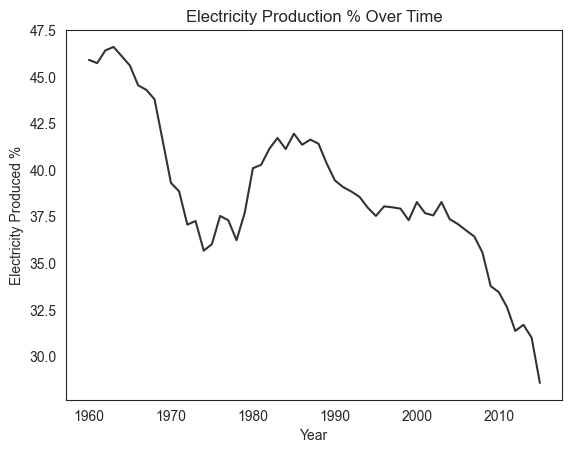

In [23]:
figure, ax = plt.subplots()
ax.plot(df1['electricity_prod'], color='#333')
ax.set_xlabel('Year')
ax.set_ylabel('Electricity Produced %')
ax.set_title('Electricity Production % Over Time')
plt.show()

In [24]:
from statsmodels.tsa.stattools import adfuller

def adf_print(time_series):
    adf_output = adfuller(time_series)
    stat = adf_output[0]
    pval = adf_output[1]
    print('ADF Statistic:', stat)
    print('p-value:', pval)
    return None

adf_print(df1)

ADF Statistic: 1.872154432675822
p-value: 0.9984818799941668


Because the p-value is large, we know that the data is not stationary

In [25]:
from pmdarima import auto_arima

auto_arima_model = auto_arima(df1['electricity_prod'])
auto_arima_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   56
Model:               SARIMAX(1, 1, 1)   Log Likelihood                 -71.684
Date:                Mon, 01 May 2023   AIC                            149.368
Time:                        14:17:44   BIC                            155.390
Sample:                    01-01-1960   HQIC                           151.697
                         - 01-01-2015                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8478      0.140      6.074      0.000       0.574       1.121
ma.L1         -0.6020      0.230     -2.622      0.009      -1.052      -0.152
sigma2         0.7894      0.171      4.604      0.000       0.453       1.125
===================================================================================
Ljung-Box (L1) (Q):                   0.17   Jarque-Bera (JB):                 1.33
Prob(Q):                              0.68   Prob(JB):                         0.51
Heteroskedasticity (H):               0.72   Skew:                             0.36
Prob(H) (two-sided):                  0.49   Kurtosis:                         3.24
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

It was found that a (1,1,1) model was the best fit using auto-arima

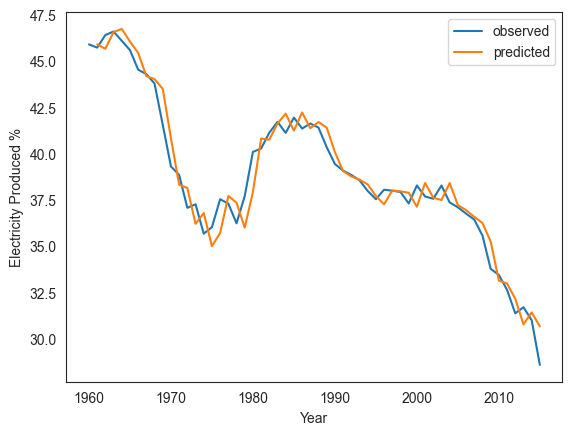

In [26]:
# make a line plot of the fitted values (fitted values and observed values on same plot)
in_samp_pred = auto_arima_model.predict_in_sample()
in_samp_pred = pd.Series(in_samp_pred, index=df1.index)

fig, ax = plt.subplots()
ax.plot(df1, label='observed')
ax.plot(in_samp_pred[1:], label='predicted')
ax.set_xlabel('Year')
ax.set_ylabel('Electricity Produced %')
ax.legend()

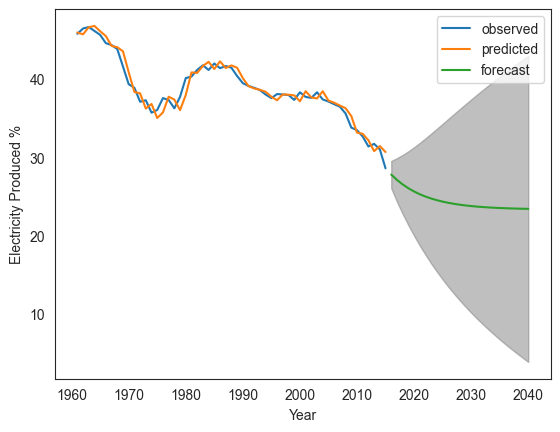

In [27]:
# make a forecast - NOT IN TEXT (use .predict or .forecast) .predict for AUTOARIMA

forecast, ci = auto_arima_model.predict(25, return_conf_int=True)
future_dates = pd.date_range(df1.index[-1], periods=26, freq='AS-JAN',inclusive='neither')

fig, ax = plt.subplots()
ax.plot(df1[1:], label='observed')
ax.plot(in_samp_pred[1:], label='predicted')
ax.plot(future_dates,forecast, label='forecast')
ax.fill_between(future_dates, ci[:,0], ci[:,1], color = 'gray', alpha=0.5) # our confidence intervals
ax.set_xlabel('Year')
ax.set_ylabel('Electricity Produced %')
ax.legend()